In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
%matplotlib inline
from IPython.display import display,HTML
pd.options.display.max_columns = None

##Setting things up

In [5]:
df = pd.read_csv('data/apib12tx.csv')
#df

In [6]:
display(df.describe())

API12B        PCT_AA        PCT_AI        PCT_AS        PCT_FI  \
count  10187.000000  10187.000000  10187.000000  10187.000000  10187.000000   
mean     787.467262      6.504172      1.109257      7.154216      2.149602   
std      104.176630     10.539728      4.082059     12.321782      4.028955   
min      317.000000      0.000000      0.000000      0.000000      0.000000   
25%      739.000000      1.000000      0.000000      1.000000      0.000000   
50%      797.000000      3.000000      0.000000      3.000000      1.000000   
75%      857.000000      8.000000      1.000000      8.000000      3.000000   
max      998.000000     95.000000     92.000000     96.000000     65.000000   

             PCT_HI        PCT_PI        PCT_WH        PCT_MR         MEALS  \
count  10187.000000  10187.000000  10187.000000  10187.000000  10187.000000   
mean      49.908216      0.504957     29.520467      2.085108     59.667517   
std       29.159250      1.031627     26.159148      2.939391     29.600844   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       24.000000      0.000000      5.000000      0.000000     36.000000   
50%       48.000000      0.000000     22.000000      1.000000     64.000000   
75%       76.000000      1.000000     51.000000      3.000000     85.000000   
max      100.000000     18.000000    100.000000     23.000000    100.000000   

             P_GATE       P_MIGED          P_EL        P_RFEP          P_DI  \
count  10187.000000  10187.000000  10187.000000  10187.000000  10187.000000   
mean       7.655738      1.470502     22.757927     12.764896     11.437911   
std        9.106379      4.015700     19.136506     11.449279     10.123154   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      7.000000      4.000000      8.000000   
50%        5.000000      0.000000     18.000000     10.000000     10.000000   
75%       11.000000      1.000000     35.000000     19.000000     13.000000   
max      100.000000     79.000000    100.000000     79.000000    100.000000   

            ACS_K3       ACS_46     ACS_CORE      PCT_RESP       NOT_HSG  \
count  6634.000000  7511.000000  4489.000000  10187.000000  10187.000000   
mean     22.059090    25.723605    23.432168     85.550702     20.058506   
std       5.839773     6.902056     7.683286     18.622835     17.679325   
min       1.000000     1.000000     1.000000      0.000000      0.000000   
25%      20.000000    24.000000    20.000000     82.000000      5.000000   
50%      23.000000    28.000000    26.000000     92.000000     16.000000   
75%      26.000000    30.000000    29.000000     97.000000     32.000000   
max      43.000000    46.000000    45.000000    100.000000    100.000000   

                HSG      SOME_COL      COL_GRAD      GRAD_SCH        AVG_ED  
count  10187.000000  10187.000000  10187.000000  10187.000000  10118.000000  
mean      24.698537     24.264651     18.515952     11.794935      2.771169  
std       12.319831     11.020448     12.452289     13.874110      0.754851  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%       16.000000     16.000000      8.000000      3.000000      2.180000  
50%       26.000000     24.000000     16.000000      6.000000      2.670000  
75%       33.000000     32.000000     28.000000     16.000000      3.290000  
max      100.000000    100.000000    100.000000     89.000000      4.880000

In [7]:
display(df.corr())

API12B    PCT_AA    PCT_AI    PCT_AS    PCT_FI    PCT_HI  \
API12B    1.000000 -0.223117 -0.126489  0.362361  0.153552 -0.418466   
PCT_AA   -0.223117  1.000000 -0.067107 -0.049370  0.057254 -0.092423   
PCT_AI   -0.126489 -0.067107  1.000000 -0.088917 -0.080058 -0.187081   
PCT_AS    0.362361 -0.049370 -0.088917  1.000000  0.232352 -0.363255   
PCT_FI    0.153552  0.057254 -0.080058  0.232352  1.000000 -0.142512   
PCT_HI   -0.418466 -0.092423 -0.187081 -0.363255 -0.142512  1.000000   
PCT_PI   -0.060199  0.219737 -0.029631  0.071994  0.282081 -0.077148   
PCT_WH    0.363066 -0.282255  0.128484 -0.077984 -0.129342 -0.784308   
PCT_MR    0.210260 -0.003058  0.054740  0.105744  0.095510 -0.458183   
MEALS    -0.528166  0.182797  0.040794 -0.312039 -0.141283  0.746475   
P_GATE    0.300525  0.011117 -0.075187  0.233122  0.128334 -0.154795   
P_MIGED  -0.153190 -0.150501 -0.020439 -0.134536 -0.106317  0.347309   
P_EL     -0.261477 -0.079102 -0.158655 -0.062005 -0.038954  0.724659   
P_RFEP   -0.200273 -0.055021 -0.161894  0.122811  0.055542  0.525937   
P_DI     -0.153766  0.070958  0.048868 -0.066227  0.004943 -0.028171   
ACS_K3    0.182052 -0.000674 -0.159973  0.126658  0.089452  0.115690   
ACS_46    0.254228 -0.070089 -0.184140  0.178142  0.120321  0.069356   
ACS_CORE  0.437987 -0.036594 -0.218363  0.251559  0.214681  0.048252   
PCT_RESP  0.223457 -0.178875 -0.031626 -0.004432  0.068215 -0.084089   
NOT_HSG  -0.535325  0.003424 -0.061002 -0.271720 -0.204777  0.798176   
HSG      -0.519386  0.149530  0.113335 -0.252820 -0.083519  0.520316   
SOME_COL  0.011033  0.134386  0.145105 -0.213072  0.090039 -0.268786   
COL_GRAD  0.591692 -0.097386 -0.075846  0.326789  0.263867 -0.685352   
GRAD_SCH  0.582731 -0.151995 -0.075958  0.389559  0.031945 -0.602600   
AVG_ED    0.652429 -0.098450 -0.030800  0.370071  0.165709 -0.797608   

            PCT_PI    PCT_WH    PCT_MR     MEALS    P_GATE   P_MIGED  \
API12B   -0.060199  0.363066  0.210260 -0.528166  0.300525 -0.153190   
PCT_AA    0.219737 -0.282255 -0.003058  0.182797  0.011117 -0.150501   
PCT_AI   -0.029631  0.128484  0.054740  0.040794 -0.075187 -0.020439   
PCT_AS    0.071994 -0.077984  0.105744 -0.312039  0.233122 -0.134536   
PCT_FI    0.282081 -0.129342  0.095510 -0.141283  0.128334 -0.106317   
PCT_HI   -0.077148 -0.784308 -0.458183  0.746475 -0.154795  0.347309   
PCT_PI    1.000000 -0.116163  0.036753  0.028549  0.004900 -0.093803   
PCT_WH   -0.116163  1.000000  0.329157 -0.695871  0.048766 -0.214935   
PCT_MR    0.036753  0.329157  1.000000 -0.381300  0.067234 -0.177547   
MEALS     0.028549 -0.695871 -0.381300  1.000000 -0.201800  0.263676   
P_GATE    0.004900  0.048766  0.067234 -0.201800  1.000000 -0.096594   
P_MIGED  -0.093803 -0.214935 -0.177547  0.263676 -0.096594  1.000000   
P_EL      0.024503 -0.665903 -0.341988  0.636838 -0.152098  0.352978   
P_RFEP   -0.007727 -0.557736 -0.303721  0.397674  0.113911  0.160924   
P_DI      0.029540  0.023305  0.006032  0.049876 -0.094255 -0.059078   
ACS_K3    0.075881 -0.176037  0.007579  0.017383  0.083439  0.036802   
ACS_46    0.049283 -0.131902  0.056607 -0.035894  0.143832 -0.013519   
ACS_CORE  0.019570 -0.126703 -0.053738 -0.095275  0.371522 -0.028966   
PCT_RESP -0.029653  0.175599  0.132515 -0.164411  0.001516  0.056428   
NOT_HSG  -0.052520 -0.664536 -0.408829  0.734150 -0.181664  0.376072   
HSG       0.083561 -0.494585 -0.295447  0.710693 -0.192168  0.124583   
SOME_COL  0.092990  0.286760  0.113340 -0.079904 -0.047112 -0.157987   
COL_GRAD  0.009552  0.580454  0.378918 -0.785937  0.224105 -0.273858   
GRAD_SCH -0.081522  0.522910  0.348351 -0.754539  0.234954 -0.201256   
AVG_ED   -0.017244  0.683077  0.432389 -0.872949  0.241601 -0.316049   

              P_EL    P_RFEP      P_DI    ACS_K3    ACS_46  ACS_CORE  \
API12B   -0.261477 -0.200273 -0.153766  0.182052  0.254228  0.437987   
PCT_AA   -0.079102 -0.055021  0.070958 -0.000674 -0.070089 -0.036594   
PCT_AI   -0.158655 -0.161894  0.048868 -0.159973 -

In [8]:
# P_MIGED
# The percentage of students enrolled in migrant education programs.

# P_GATE
# The percentage of students enrolled in Gifted and Talented education programs.

# NOT_HSG
# Parent Education Level: Percent Not High School Graduate

# HSG
# Parent Education Level: Percent High School Graduate

# SOME_COL
# Parent Education Level: Percent Some College

# COL_GRAD
# Parent Education Level: Percent College Graduate

# GRAD_SCH
# Parent Education Level: Percent Graduate School

# AVG_ED
# Average Parent Education Level

```
If the education level of a student's parent is pertty higher,eg they graduate at graduate school, then their childeren maybe considered have more possibility to attend talented and gifted education programs than migrant education programs.
The percentage of students enrolled in migrant education programs is often used to as a proxy for low poverty or parents' lower education level.
```

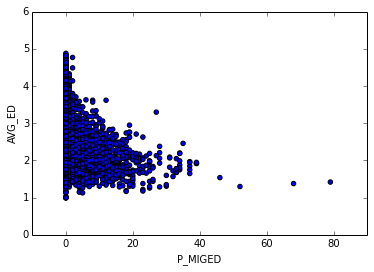

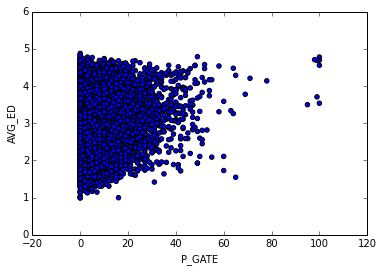

In [9]:
df.plot(kind="scatter", x="P_MIGED", y="AVG_ED")
df.plot(kind="scatter", x="P_GATE", y="AVG_ED")

```
The difference in education programs is often a factor to predict how well a student will do in school.
```

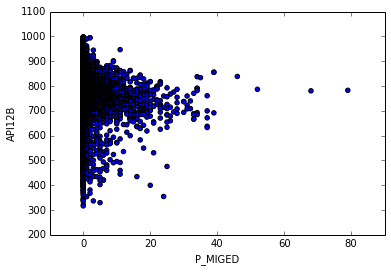

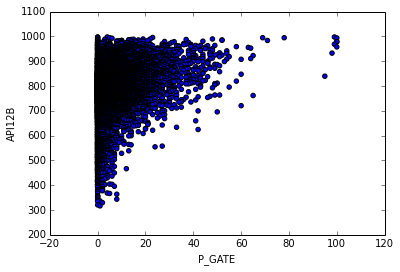

In [10]:
df.plot(kind="scatter", x="P_MIGED", y="API12B")
df.plot(kind="scatter", x="P_GATE", y="API12B")

##Running the regression

####First, Let's start by looking at California's parents education level as it relates to the programs students may enroll.

In [12]:
## For those who enroll in Migrant Education Programs
data_ = np.asarray(df[['P_MIGED','AVG_ED']])
data_mig = Imputer().fit_transform(data_mig)
#data_mig
x, y = data_mig[:, 1:], data_mig[:, 0]
lr_mig = LinearRegression() 
lr_mig.fit(x, y)
# plot the linear regression line on the scatter plot
lr_mig.coef_
lr_mig.score(x, y)
plt.scatter(x, y, color='blue')
plt.plot(x, lr_mig.predict(x), color='red', linewidth=1)

NameError: name 'data_mig' is not defined

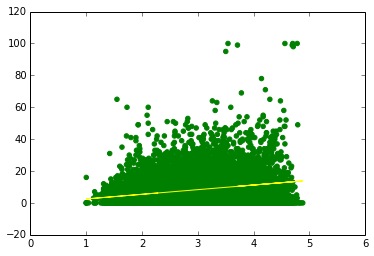

In [13]:
## For those who enroll in Talented and Gifted Education Programs
data_gate = np.asarray(df[['P_GATE','AVG_ED']])
data_gate = Imputer().fit_transform(data_gate)
#data_gate
x, y = data_gate[:, 1:], data_gate[:, 0]
lr_gate = LinearRegression() 
lr_gate.fit(x, y)
# plot the linear regression line on the scatter plot
lr_gate.coef_
lr_gate.score(x, y)
plt.scatter(x, y, color='green')
plt.plot(x, lr_gate.predict(x), color='yellow', linewidth=1)

```
Lets first look at La Jolla Elementary school in San Diego, which API is 985, the average education level of it is 4.56, based on the model I made, the percent of students who maybe enroll in the talented and gifted education programs will be 12.86, but there are truly 48 percent of students are enrolled in gifted education, meanwhile there are 0 student in migrant education programs.
```

In [14]:
display(df[(df['P_GATE'] >= 10) & (df['AVG_ED'] >= 2.5)])

CHARTER                                     SNAME  \
2         NaN                           Manchester Gate   
4         NaN               Mission San Jose Elementary   
6         NaN                     Gretchen Whitney High   
7         NaN                            Oxford Academy   
9         NaN                                   Elkhorn   
11        NaN                     John Gomes Elementary   
12        NaN                   Torrey Pines Elementary   
13        NaN                        North Star Academy   
17        NaN                  Tom Matsumoto Elementary   
18        NaN                 Independent Study Program   
19        NaN                     Joaquin Miller Middle   
22        NaN               William Hopkins Junior High   
23        NaN                 Jack L. Weaver Elementary   
25        NaN                    John F. Kennedy Middle   
26        NaN                       La Jolla Elementary   
27        NaN                  Sleepy Hollow Elementary   
28        NaN               Robert C. Fisler Elementary   
29        NaN                          Foothills Middle   
30        NaN  Balboa Gifted/High Ability Magnet Elemen   
31        NaN                     Oak Avenue Elementary   
35        NaN                      Covington Elementary   
36        NaN                 Ardis G. Egan Junior High   
37        NaN              Joshua Chadbourne Elementary   
38        NaN                    Windemere Ranch Middle   
39        NaN                Stevenson Ranch Elementary   
40        NaN                 Ethan B. Allen Elementary   
45        NaN                       Argonaut Elementary   
46        NaN                            Redwood Middle   
47        NaN                   Hidden Hills Elementary   
48        NaN              Wonderland Avenue Elementary   
...       ...                                       ...   
8642      NaN        Maxwell Park International Academy   
8643      NaN                                       NaN   
8678      NaN                   Napa Valley Alternative   
8679      NaN              Academy of Arts and Sciences   
8713        Y                                   The MET   
8758      NaN                              Barstow High   
8772      NaN                             Mt. Eden High   
8773      NaN                         Mount Miguel High   
8789      NaN                                Fulton K-8   
8790      NaN                          Mission Bay High   
8864      NaN                        Carson Senior High   
8904      NaN       Valley Academy of Arts and Sciences   
8943      NaN                          Kern Valley High   
8945        D                             Audeo Charter   
8991      NaN                          Claremont Middle   
9028      NaN     Acalanes Center for Independent Study   
9042      NaN  Drew (Charles) College Preparatory Acade   
9059      NaN                      Mountain Empire High   
9075      NaN                        Pinole Valley High   
9101      NaN                    El Cerrito Senior High   
9127        Y             Diamond Mountain Charter High   
9175      NaN                Sunset High (Continuation)   
9257      NaN                             Foothill Plus   
9309        D                 Coleman Tech Charter High   
9311        D               Charter School of San Diego   
9357      NaN               Alta Vista Alternative High   
9373      NaN                              Mission High   
9432      NaN                                       NaN   
9443      NaN                             Dunsmuir High   
10056     NaN   S.F. County Court Woodside Learning Ctr   

                                DNAME           CNAME  API12B ST_RANK  PCT_AA  \
2                      Fresno Unified          Fresno     998      10       4   
4                     Fremont Unified         Alameda     996      10       0   
6                         ABC Unified     Los Angeles     995      10       2   
7                  Anah

In [15]:
lr_mig.predict(4.56)

NameError: name 'lr_mig' is not defined

In [16]:
lr_gate.predict(2.59)

array([ 7.12822586])

```
Then lets look at Frank Zeek Elementary in Mendocino
the percentage of stduents in mig programs are 8 and the precentage of them in gifted and talented programs are 14.
Based at our model, the parents' education level is 2.59, the per in mig programs should be 1.77, and those who in gifted and talented programs are 7.1. 

```

In [17]:
display(df[(df['P_GATE'] == 8) & (df['AVG_ED'] == 2.59)])

CHARTER                        SNAME                  DNAME        CNAME  \
4155     NaN        Frank Zeek Elementary          Ukiah Unified    Mendocino   
5115     NaN                          NaN   El Centro Elementary     Imperial   
6093     NaN  Plainview Avenue Elementary    Los Angeles Unified  Los Angeles   
6275     NaN        Lark Ellen Elementary  Covina-Valley Unified  Los Angeles   
6365     NaN                  Corona High   Corona-Norco Unified    Riverside   

      API12B ST_RANK  PCT_AA  PCT_AI  PCT_AS  PCT_FI  PCT_HI  PCT_PI  PCT_WH  \
4155     817       6       1       5       2       4      44       0      43   
5115     797       B       1       0       1       0      92       0       5   
6093     776       3       1       1       3       5      58       0      32   
6275     772       3       2       1       3       3      84       1       4   
6365     770       6       3       0       3       1      64       1      27   

      PCT_MR  MEALS  P_GATE  P_MIGED  P_EL  P_RFEP  P_DI  ACS_K3  ACS_46  \
4155       0     75       8       14    31      10    10      26      28   
5115       0     81       8        9    44      16    10      23      27   
6093       0     74       8        0    24      14    23      14      15   
6275       1     78       8        0    28       8    15      20      24   
6365       0     54       8        0    10      29    11     NaN     NaN   

      ACS_CORE  PCT_RESP  NOT_HSG  HSG  SOME_COL  COL_GRAD  GRAD_SCH  AVG_ED  
4155       NaN       100       19   26        38        13         4    2.59  
5115        27        84       15   36        31        12         6    2.59  
6093       NaN        88       25   22        29        18         6    2.59  
6275       NaN        99       19   30        31        15         5    2.59  
6365        30        89       24   24        28        17         7    2.59

In [18]:
lr_mig.predict(2.59)

NameError: name 'lr_mig' is not defined

In [19]:
lr_gate.predict(2.59)

array([ 7.12822586])

####Secondly, Let's start by looking at California's students programs they may enroll, as academic performance index  maybe relate to this.

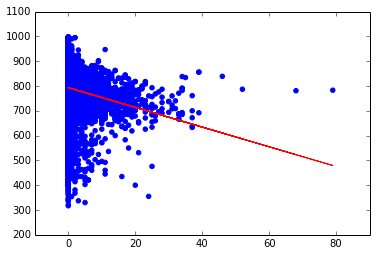

In [20]:
## For those who enroll in Migrant Education Programs
data_mig_api= np.asarray(df[['API12B','P_MIGED']])
data_mig_api = Imputer().fit_transform(data_mig_api)
#data_mig_api
x, y = data_mig_api[:, 1:], data_mig_api[:, 0]
lr_mig_api = LinearRegression() 
lr_mig_api.fit(x, y)
# plot the linear regression line on the scatter plot
lr_mig_api.coef_
lr_mig_api.score(x, y)
plt.scatter(x, y, color='blue')
plt.plot(x, lr_mig_api.predict(x), color='red', linewidth=1)

In [21]:
display(df[(df['P_MIGED'] >= 50) & (df['API12B']  >= 700)])

CHARTER                  SNAME                        DNAME CNAME  \
5615     NaN    A. M. Thomas Middle  Lost Hills Union Elementary  Kern   
5794     NaN  Lost Hills Elementary  Lost Hills Union Elementary  Kern   
5880     NaN                    NaN  Lost Hills Union Elementary  Kern   

      API12B ST_RANK  PCT_AA  PCT_AI  PCT_AS  PCT_FI  PCT_HI  PCT_PI  PCT_WH  \
5615     787       5       0       0       1       0      99       0       0   
5794     783       4       0       0       1       0      97       0       0   
5880     781       B       0       0       1       0      98       0       0   

      PCT_MR  MEALS  P_GATE  P_MIGED  P_EL  P_RFEP  P_DI  ACS_K3  ACS_46  \
5615       0     82       0       52    61      35     8     NaN      18   
5794       0     94       0       79    89       4     6      23      16   
5880       0     90       0       68    78      15     8      23      17   

      ACS_CORE  PCT_RESP  NOT_HSG  HSG  SOME_COL  COL_GRAD  GRAD_SCH  AVG_ED  
5615        21        99       76   20         1         1         1    1.30  
5794       NaN        98       66   29         3         1         1    1.42  
5880        21        97       70   26         3         1         1    1.38

In [22]:
lr_mig_api.predict(52)

array([ 586.65819064])

In [23]:
lr_mig_api.predict(79)

array([ 479.35760175])

```
Let's look specifically at Lost Hills Union Elementary (A. M. Thomas Middle,Lost Hills Elementary),
which has an API of 783, 787 and 52 and 79 percent of students being in the migrant educational programs. If you were to use the above regression to predict how well Lost Hills Union would do, it would look like this:
With an index of 586 and 479, clearly the school is overperforming what our simplified model expects.
```


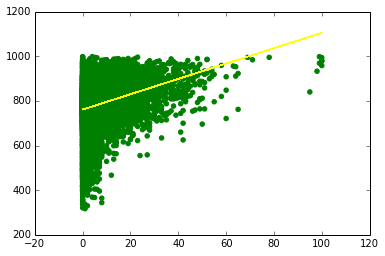

In [24]:
## For those who enroll in Talented and Gifted Education Programs
data_gate_api = np.asarray(df[['API12B','P_GATE']])
data_gate_api = Imputer().fit_transform(data_gate_api)
#data_gate_api
x, y = data_gate_api[:, 1:], data_gate_api[:, 0]
lr_gate_api = LinearRegression() 
lr_gate_api.fit(x, y)
# plot the linear regression line on the scatter plot
lr_gate_api.coef_
lr_gate_api.score(x, y)
plt.scatter(x, y, color='green')
plt.plot(x, lr_gate_api.predict(x), color='yellow', linewidth=1)

In [25]:
display(df[(df['P_GATE'] == 41) & (df['API12B']  >= 750)])

CHARTER                         SNAME                         DNAME  \
134      NaN                 Miller's Hill                       Latrobe   
277      NaN            Peralta Elementary               Oakland Unified   
716      NaN            Aviara Oaks Middle              Carlsbad Unified   
829      NaN          Canyon Crest Academy       San Dieguito Union High   
1051     NaN             Challenger Middle             San Diego Unified   
1854     NaN              Toler Elementary             San Diego Unified   
2179     NaN                 Sutter Middle       Sacramento City Unified   
3477     NaN  Santa Ynez Valley Union High  Santa Ynez Valley Union High   
3802     NaN          University City High             San Diego Unified   
5579     NaN            Granite Hills High          Grossmont Union High   

              CNAME  API12B ST_RANK  PCT_AA  PCT_AI  PCT_AS  PCT_FI  PCT_HI  \
134       El Dorado     964      10       0       0       1       0       7   
277         Alameda     951      10      17       0       3       1      16   
716       San Diego     923      10       2       1      10       1      16   
829       San Diego     917      10       1       0      17       1       5   
1051      San Diego     908       9       5       0      24      24      21   
1854      San Diego     878       8       3       1       4       0      55   
2179     Sacramento     868       8      11       1      18       1      31   
3477  Santa Barbara     833       9       0       1       1       0      39   
3802      San Diego     825       8       6       0      11       7      34   
5579      San Diego     787       7       3       2       1       1      28   

      PCT_PI  PCT_WH  PCT_MR  MEALS  P_GATE  P_MIGED  P_EL  P_RFEP  P_DI  \
134        0      82      10      5      41        0     0       0    11   
277        0      40       9     39      41        0     7       2     2   
716        0      65       3     12      41        0     4       5     7   
829        0      75       1      2      41        0     0       4     9   
1051       1      17       7     44      41        0     6      27     8   
1854       0      34       3     62      41        0    38       6     7   
2179       1      30       7     45      41        0     4      14     7   
3477       0      55       4     25      41        0     8      20    12   
3802       0      36       5     40      41        0     7      23     7   
5579       1      64       0     26      41        0     9      12    12   

      ACS_K3  ACS_46  ACS_CORE  PCT_RESP  NOT_HSG  HSG  SOME_COL  COL_GRAD  \
134      NaN      19       NaN       100        0    1        24        50   
277       27      31       NaN        59        0    7         9        32   
716      NaN      32        28        97        3    6        15        39   
829      NaN     NaN        34        95        0    1         7        29   
1051     NaN      33        31        95        3   16        27        39   
1854      21      29       NaN        86        5   27        22        27   
2179     NaN     NaN        30        89       12   24        27        23   
3477     NaN     NaN        26        99       17   10        24        30   
3802     NaN     NaN        31        95        7   18        20        29   
5579     NaN     NaN        27        98        7   26        36        19   

      GRAD_SCH  AVG_ED  
134         24    3.98  
277         52    4.30  
716         37    4.02  
829         63    4.52  
1051        14    3.45  
1854        19    3.27  
2179        14    3.05  
3477        20    3.27  
3802        26    3.48  
5579        12    3.02

In [26]:
lr_gate_api.predict(58)

array([ 960.55049909])

In [27]:
lr_gate_api.predict(41)

array([ 902.10461284])

```
Let's look specifically at Granite Hills High in San Diego,
which has an API of 787 and 41 percent of students being in the talented and gifted educational programs. If you were to use the above regression to predict how well Granite Hills High would do, it would look like this:
With an index of 902, clearly the school is under-performing what our simplified model expects.

```